In [1]:
import sys
from pathlib import Path

# Get the project root path and add it to sys.path
project_root = Path().resolve().parent  # Adjust to point to your project root if necessary
src_path = project_root / 'src'

if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

In [65]:
import pandas as pd
import numpy as np
from data_loader import DataLoader
import eda
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_id = DataLoader("../data/train_identity.csv")
train_trans = DataLoader("../data/train_transaction.csv")

print(train_id.dataset.shape)
print(train_trans.dataset.shape)

(144233, 41)
(590540, 394)


## Merge the dataset

In [19]:
eda_df = pd.merge(train_id.dataset, train_trans.dataset, how='inner', on='TransactionID')
print(eda_df.shape)

(144233, 434)


## Exploratory Data Analysis

### Id dataset

In [49]:
fraud_df = eda_df.query('isFraud==1')
no_fraud_df = eda_df.query('isFraud==0')

In [108]:
explorer = eda.EDA(fraud_df)

In [109]:
print(explorer.dataframe_shape_and_unique_identifier())

DataFrame Shape: (11318, 434)
Unique Identifier Column: TransactionID
None


In [110]:
for col in eda_df.columns.tolist():
    missing_count, missing_perc = explorer.missing_values(col)
    print(f"Missing in {col}: {missing_count} ({round(missing_perc,2)}%)")

Missing in TransactionID: 0 (0.0%)
Missing in id_01: 0 (0.0%)
Missing in id_02: 96 (0.85%)
Missing in id_03: 4206 (37.16%)
Missing in id_04: 4206 (37.16%)
Missing in id_05: 336 (2.97%)
Missing in id_06: 336 (2.97%)
Missing in id_07: 10892 (96.24%)
Missing in id_08: 10892 (96.24%)
Missing in id_09: 3491 (30.84%)
Missing in id_10: 3491 (30.84%)
Missing in id_11: 100 (0.88%)
Missing in id_12: 0 (0.0%)
Missing in id_13: 730 (6.45%)
Missing in id_14: 7739 (68.38%)
Missing in id_15: 96 (0.85%)
Missing in id_16: 1166 (10.3%)
Missing in id_17: 272 (2.4%)
Missing in id_18: 7583 (67.0%)
Missing in id_19: 280 (2.47%)
Missing in id_20: 287 (2.54%)
Missing in id_21: 10892 (96.24%)
Missing in id_22: 10892 (96.24%)
Missing in id_23: 10892 (96.24%)
Missing in id_24: 10916 (96.45%)
Missing in id_25: 10901 (96.32%)
Missing in id_26: 10893 (96.24%)
Missing in id_27: 10892 (96.24%)
Missing in id_28: 100 (0.88%)
Missing in id_29: 100 (0.88%)
Missing in id_30: 7876 (69.59%)
Missing in id_31: 147 (1.3%)
Miss

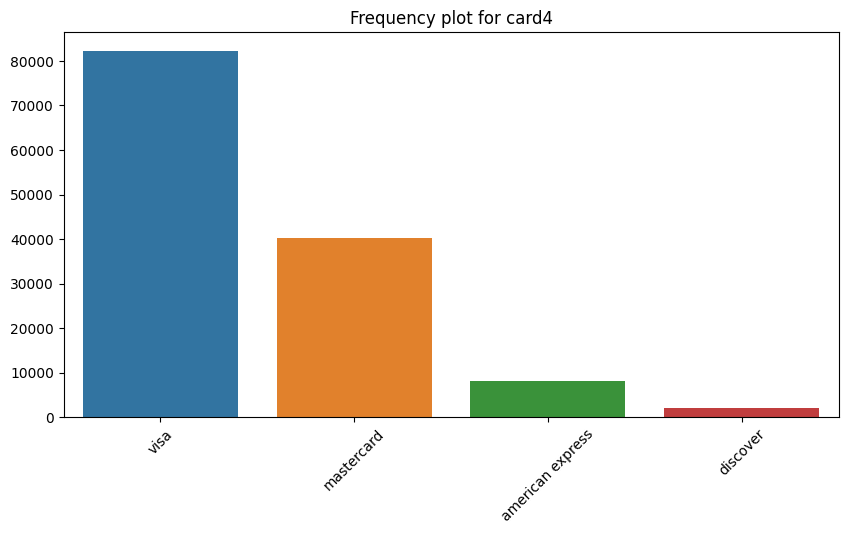

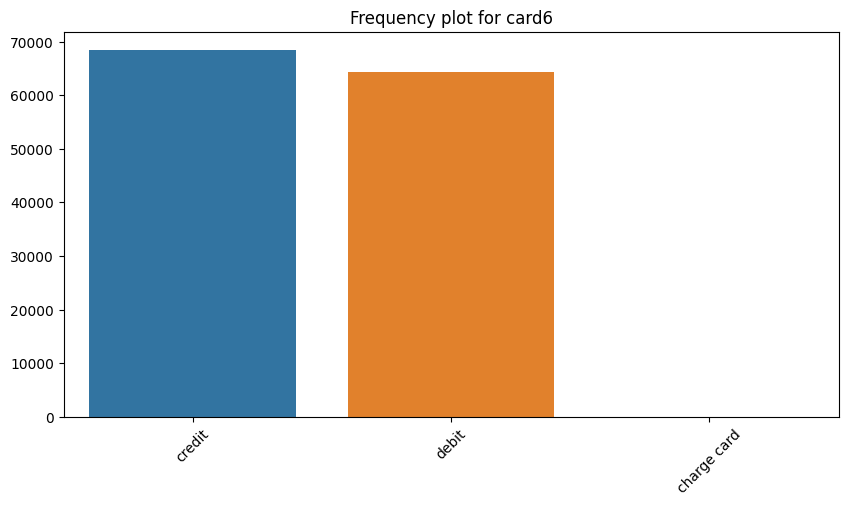

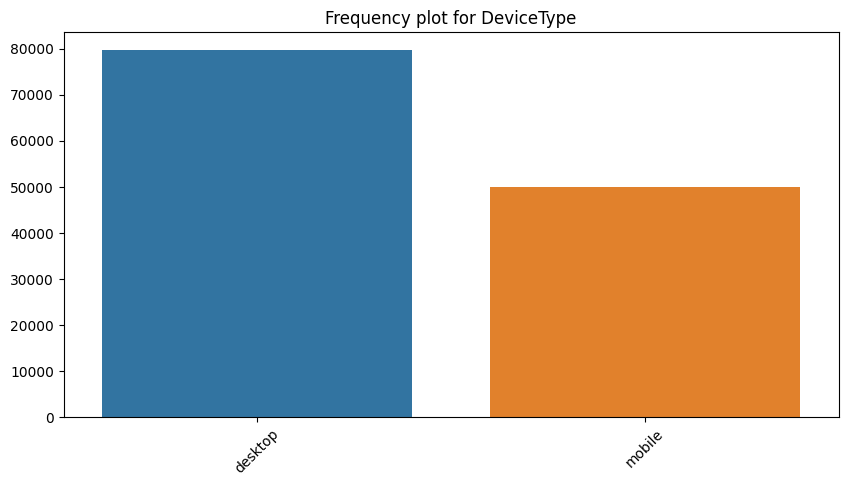

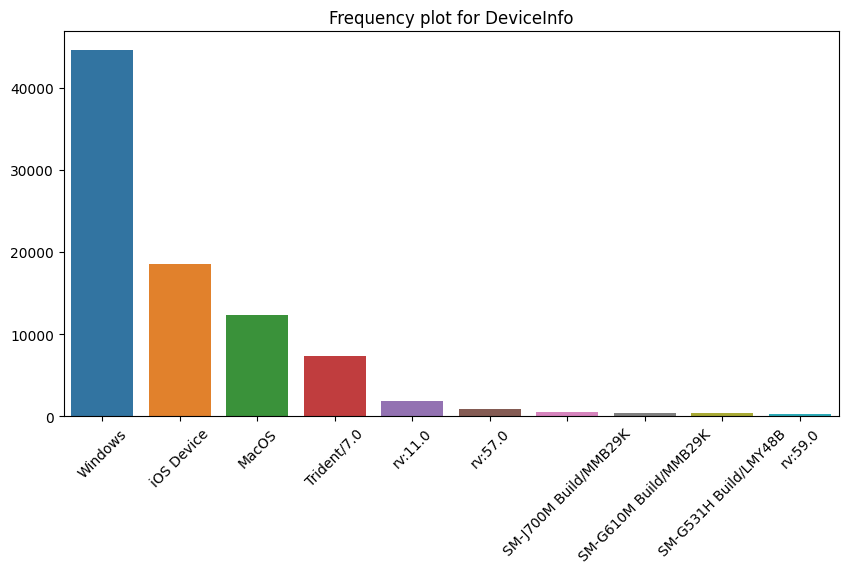

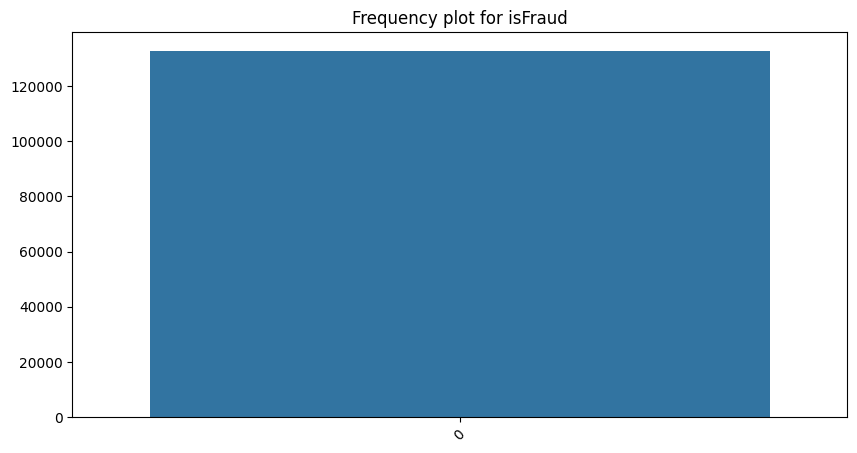

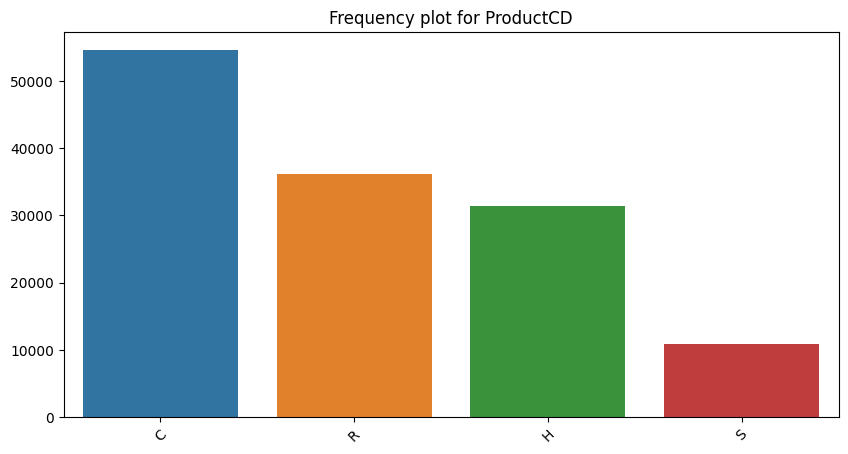

     Variable  Number of Categories
0       card4                     4
1       card6                     3
2  DeviceType                     2
3  DeviceInfo                  1740
4     isFraud                     1
5   ProductCD                     4


In [103]:
explorer.frequency_plot(columns=['card4', 'card6', 'DeviceType', 'DeviceInfo', 'isFraud', 'ProductCD'])

In [77]:
eda_df[[f"card{i}" for i in range(1,7)]].head()
# eda_df[["addr1", "addr2"]]
# eda_df[[f"M{i}" for i in range(1,10)]].head(20)
# eda_df[[f"C{i}" for i in range(1,15)]].head(20)
# eda_df[[f"D{i}" for i in range(1,16)]].head(10)
# eda_df.columns.tolist()

,card1,card2,card3,card4,card5,card6
0,4497,514.0,150.0,mastercard,102.0,credit
1,2803,100.0,150.0,visa,226.0,debit
2,16496,352.0,117.0,mastercard,134.0,credit
3,4461,375.0,185.0,mastercard,224.0,debit
4,1790,555.0,150.0,visa,226.0,debit


In [45]:
fraud_mean = eda_df.query('isFraud==1')[[f"C{i}" for i in range(1,15)]].mean().tolist()
nofraud_mean = eda_df.query('isFraud==0')[[f"C{i}" for i in range(1,15)]].mean().tolist()
x = pd.DataFrame(columns=['fraud', 'no_fraud'])
x['fraud'] = fraud_mean
x['no_fraud'] = nofraud_mean
x.index = [f"C{i}" for i in range(1,15)]
x

,fraud,no_fraud
C1,57.265948,25.284054
C2,74.594010,30.917203
C3,0.000442,0.024956
C4,26.089857,14.710627
C5,0.000000,0.000000
C6,26.107351,14.686868
C7,20.427107,9.668608
C8,36.555487,17.933935
C9,0.000000,0.000000
C10,33.445308,18.624489


### TransactionDT, D1 to D15

In [131]:
# TransactionDT is in timedelta format, thus it is in seconds
# converting to day
eda_df['TransactionDay'] = np.floor(eda_df['TransactionDT']/(24*60*60))

<Axes: xlabel='TransactionDT', ylabel='Count'>

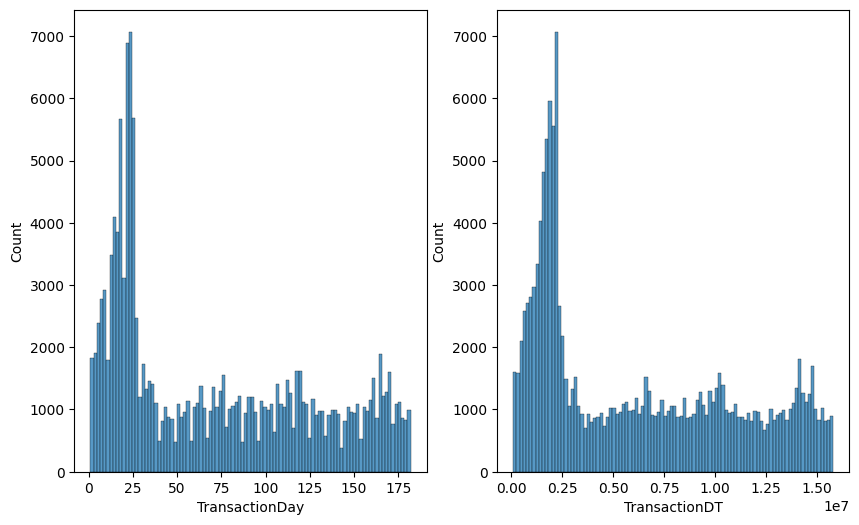

In [132]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.histplot(eda_df['TransactionDay'], bins=100, ax=ax[0])
sns.histplot(eda_df['TransactionDT'], bins=100, ax=ax[1])

In [133]:
for i in range(1,16):
    eda_df[f'D{i}_to_transaction'] = eda_df['TransactionDay'] - eda_df[f'D{i}']

In [134]:
eda_df[['TransactionDay']+[f"D{i}_to_transaction" for i in range(1,16)]].head()

,TransactionDay,D1_to_transaction,D2_to_transaction,D3_to_transaction,D4_to_transaction,D5_to_transaction,D6_to_transaction,D7_to_transaction,D8_to_transaction,D9_to_transaction,D10_to_transaction,D11_to_transaction,D12_to_transaction,D13_to_transaction,D14_to_transaction,D15_to_transaction
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,-82.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0
3,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0
4,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-25.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
